In [1]:
!pip install pandas

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

In [3]:
df

,Unnamed: 0,embedded,label
0,0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...,...
11610,11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df

,embedded,label
0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...
11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [6]:
df['label'].value_counts()

label
1    5828
0    5787
Name: count, dtype: int64

In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import ast
import re

# Define a cleanup function
def fix_and_eval(vector_str):
    try:
        # Insert missing commas between adjacent numbers using regex
        cleaned_str = re.sub(r'(?<=[\deE])\s+(?=[\-\d])', ', ', vector_str.strip())
        return np.array(ast.literal_eval(cleaned_str))
    except Exception as e:
        print("Error parsing:", vector_str[:100], "\nError:", e)
        return np.nan

# Apply the cleanup function
df['embedded'] = df['embedded'].apply(fix_and_eval)

# Optional: drop rows with failed parsing
df = df.dropna(subset=['embedded'])
from sklearn.model_selection import train_test_split

X = np.stack(df['embedded'].values)
y = df['label'].values


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_curve, auc

# Example Data (Use your own dataset here)
# X, y = your_data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train

array([[-0.5951156 ,  0.38908443, -0.23738527, ..., -0.3742781 ,
        -0.29192826,  0.39543086],
       [-0.80808717,  0.39585629, -0.19661014, ..., -0.35699996,
        -0.00350313, -0.29407081],
       [-0.58719873,  0.42662799, -0.18509169, ..., -0.2385565 ,
        -0.06887847, -0.09550839],
       ...,
       [-0.34048086,  0.58108461,  0.2205406 , ..., -0.39988556,
         0.05122917,  0.27209544],
       [-0.3900339 ,  0.50966912, -0.01720418, ..., -0.24908972,
         0.15578017, -0.23438987],
       [-0.640944  ,  0.32086438, -0.12651488, ..., -0.16581145,
        -0.21322036, -0.17846982]])

# Model Development

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    return model, y_pred


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Accuracy: 0.5208781747739991
Precision: 0.533167495854063
Recall: 0.5389773679798826
F1 Score: 0.5360566902876198


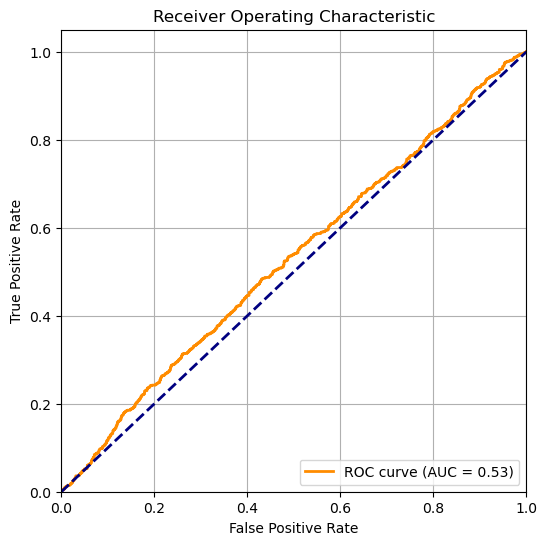

In [11]:
model, y_pred = train_logistic_regression(X_train, y_train, X_test, y_test)
plot_roc_curve(model, X_test, y_test)


## SVM

Fold 1 - AUC: 0.51
Fold 2 - AUC: 0.50
Fold 3 - AUC: 0.50
Fold 4 - AUC: 0.50
Fold 5 - AUC: 0.50

Average Metrics Across Folds:
Accuracy: 0.49
Precision: 0.49
Recall: 0.51
F1 Score: 0.50
ROC AUC: 0.50


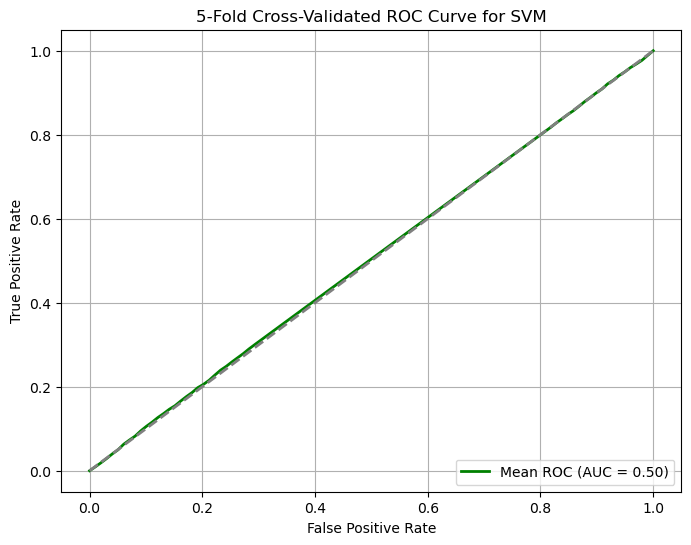

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)

# Example Data (use your actual dataset)
# X, y = your_data

# Set number of folds
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize metric containers
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Normalize features within the fold
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train SVM
    svm = SVC(kernel='linear', probability=True, random_state=42)
    svm.fit(X_train, y_train)

    # Predictions
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    # Store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Interpolate ROC curve
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    print(f"Fold {fold} - AUC: {roc_auc:.2f}")

# Average metrics
print("\nAverage Metrics Across Folds:")
print(f"Accuracy: {np.mean(accuracies):.2f}")
print(f"Precision: {np.mean(precisions):.2f}")
print(f"Recall: {np.mean(recalls):.2f}")
print(f"F1 Score: {np.mean(f1_scores):.2f}")
print(f"ROC AUC: {np.mean(roc_aucs):.2f}")

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='green', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{k}-Fold Cross-Validated ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Tree

## Naive Bayes

## Neural Networks

Epoch 1/60


/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.4927 - accuracy: 0.4894 - loss: 3.7205 - val_AUC: 0.4993 - val_accuracy: 0.5136 - val_loss: 0.8258 - learning_rate: 5.0000e-05
Epoch 2/60
 55/291 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4750 - accuracy: 0.4967 - loss: 2.1981

/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4919 - accuracy: 0.5001 - loss: 2.1117 - val_AUC: 0.5013 - val_accuracy: 0.5136 - val_loss: 0.9702 - learning_rate: 5.0000e-05
Epoch 3/60
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5232 - accuracy: 0.5044 - loss: 1.9392 - val_AUC: 0.5036 - val_accuracy: 0.5136 - val_loss: 0.9770 - learning_rate: 5.0000e-05
Epoch 4/60
287/291 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5071 - accuracy: 0.5056 - loss: 1.9362
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5070 - accuracy: 0.5055 - loss: 1.9364 - val_AUC: 0.5063 - val_accuracy: 0.5136 - val_loss: 1.0204 - learning_rate: 5.0000e-05
Epoch 5/60
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5115 - accuracy: 0.4983 - loss: 1.9107 - val_AUC: 0.5033 - val_accuracy: 0.5136 - val_loss: 1.0021 - learning_rate: 2.5000e-05
Epoch 6/60
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5193 - accuracy: 0.5122 - loss: 1

/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vaishtaruni/anaconda3/envs/vaishML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

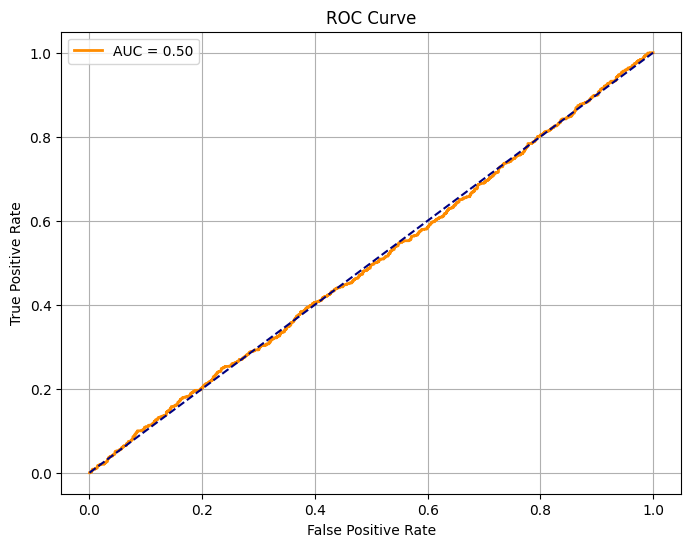

In [57]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Class weight tuning (you can use sklearn's compute_class_weight for more precision)
class_weights = {0: 1., 1: 10.}  # Try reducing from 20 to 10 for more stability

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))  # More neurons in first layer
model.add(BatchNormalization())  # Helps with convergence
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Slightly higher dropout to reduce overfitting

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))  # Slightly less dropout deeper into the network

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Lowered LR for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_auc',       # Stop when validation AUC stops improving
    mode='max',              # Because higher AUC is better
    patience=5,              # Wait 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)


# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

# Predict
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype("int32")

# Evaluation
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="navy")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Bagging - with top 3 performing models

## Boosting - Gradient Boosting 

# ROC Curve Analysis

## Graphing

## Analyzing

# Evaluation Functions

## Confusion Matrix

## F-1 Precision Recall

In [55]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))


(array([0, 1]), array([4657, 4635]))
(array([0, 1]), array([1130, 1193]))
